# Dataset_and_dataloader

将多维度的数据（数据的多个Feature）作为输入

In [6]:
import torch
import numpy as np

# dataset抽象的类不可实例, DataLoader可以
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt


## Prepare dataset

此次实验主要重点在数据的相关准备，并使用mini- batch


In [7]:
# 建立处理数据的类
# Dataset 是抽象的类，只能被继承
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        
        # 获取数据的数量
        self.len = xy.shape[0]
        
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
    
    # 使数据可以通过下标直接使用；返回数据样本，就直接根据索引指出就好
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

dataset = DiabetesDataset('diabetes.csv.gz') 

# DataLoader就可以对数据进行处理，其是pytorch对数据处理的相关函数
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2) # 是否多线程

## Design model using Class

设计相关的模型，这里的网络模型是8维-6维-4维-1维


In [8]:
# 继承内置的类，这个类
class Model(torch.nn.Module):
    def __init__(self):
        # 调用父类的构造的init
        super(Model, self).__init__()
         
        # 构造网络
        # 实现 8维-6维-4维-1维 的过程
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)        
        self.linear3 = torch.nn.Linear(4, 1)        
        self.sigmoid = torch.nn.Sigmoid()  
        
        # 可以尝试不同的activate function
        # self.activate = torch.nn.ReLU()
        
    def forward(self, x):
        # 即直接调用类中创建的linear，即这个函数使用了call方法；因此可以直接使用LogisticRegresssionModel（x）
        # 使用sigmoid函数
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
        
        # x 就可以变为self.activate(self.linear1(x))
        # 并最后可以用x = self.sigmoid(self.linear3(x))来控制输出

# 调用
model = Model()


## Construct loss and optimizer

直接使用PyTorch的API就好

In [9]:
# BCE,概率相关的loss，具体数学过程略
criterion = torch.nn.BCELoss(reduction='sum')

# 优化（随机梯度下降）
# 作用是找到所有的变量（自动检查），并且设置学习速率
# 可以使用.Adam .RMSprop 等等的方法
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


## Training cycle

进行前馈，反向传播，更新的训练过程


In [ ]:
if __name__ == '__main__':
    for epoch in range(100):
        for i, data in enumerate(train_loader, 0):
        # 1. Prepare data
            inputs, labels = data
        # 2. Forward 
            y_pred = model(inputs) 
            loss = criterion(y_pred, labels) 
            print(epoch, i, loss.item()) 
        # 3. Backward optimizer.zero_grad() 
            loss.backward() 
        # 4. Update 
            optimizer.step()

In [ ]:
batch_list = []
loss_list = []

batch_num = 1

for epoch in range(200):
    
    # 每次提取出每个batch(x, y)
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # forward
        # 这里是一次性将数据送入，使用 mini- batch
        y_perd = model(inputs)
        # 计算loss
        loss = criterion(y_perd, labels)

        batch_list.append(batch_num)
        batch_num+=1
        
        print(epoch, loss.item())
        loss_list.append(loss.item())

        # backward
        # 训练的时候先将梯度归零
        optimizer.zero_grad()
        loss.backward()

        # update
        optimizer.step()

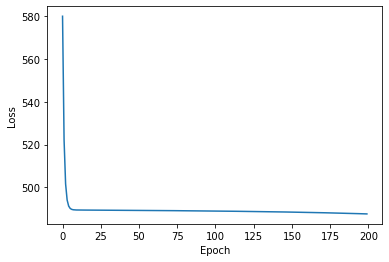

In [7]:
plt.plot(batch_list, loss_list)
plt.ylabel('Loss')
plt.xlabel('Batch')
plt.show()

最后结果分析：此次模型最后的loss很奇怪，先降低，后升高，又降低，具体原因以后在继续探究